### Loading Data

In [1]:
# Import Pandas
import pandas as pd

In [2]:
# Load the dataset

pima = pd.read_csv("diabetes.csv")

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X = pima.drop(["Outcome"],axis=1) # Features
y = pima.Outcome # Outcome

In [11]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25, random_state = 0)

In [16]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
regressor = LogisticRegression()

# fit the model with data
regressor.fit(X_train,y_train)

# Predict the test Model
y_pred = regressor.predict(X_test)

C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

In [18]:
# Here, you will visualize the confusion matrix using Heatmap.
# import required modules

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted Label')

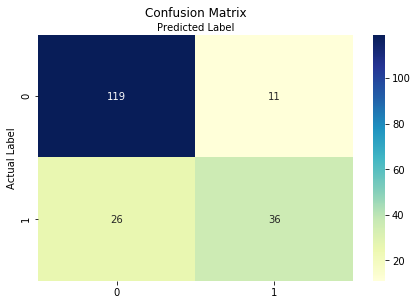

In [30]:
class_names = [0,1] # name of classes
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

# create Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


In [32]:
#Confusion Matrix Evaluation Metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


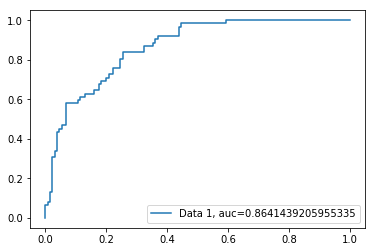

In [37]:
#ROC Curve
y_pred_proba = regressor.predict_proba(X_test)[::,1]
fpr,tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr,label="Data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()